In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_excel("C:/Users/hacke/OneDrive/Desktop/Book2.xlsx")
df.head()

,Gender,Major,Language,Grade,Location,Salary,Mismatch
0,Male,Business Administration,Yes,Good,HCMC,10,Horizontal mismatch
1,Male,Business Administration,Yes,Good,HCMC,12,Intrusmental mismatch
2,Male,Business Administration,Yes,Good,HCMC,15,Professional mismatch
3,Male,Business Administration,Yes,Good,HCMC,18,No mismatch
4,Male,Business Administration,Yes,Pass,Hanoi,13,No mismatch


In [ ]:
# Describe independent variables
df.describe(include = object)

,Gender,Major,Language,Grade,Location,Mismatch
count,3308,3308,3308,3308,3308,3308
unique,2,11,2,4,3,4
top,Female,Economics,Yes,Good,Hanoi,Professional mismatch
freq,2453,841,3165,1492,1678,1706


In [ ]:
# Describe dependent variable
df.describe()

,Salary
count,3308.000000
mean,15.657497
std,4.905609
min,7.000000
25%,12.000000
50%,15.000000
75%,19.000000
max,29.000000


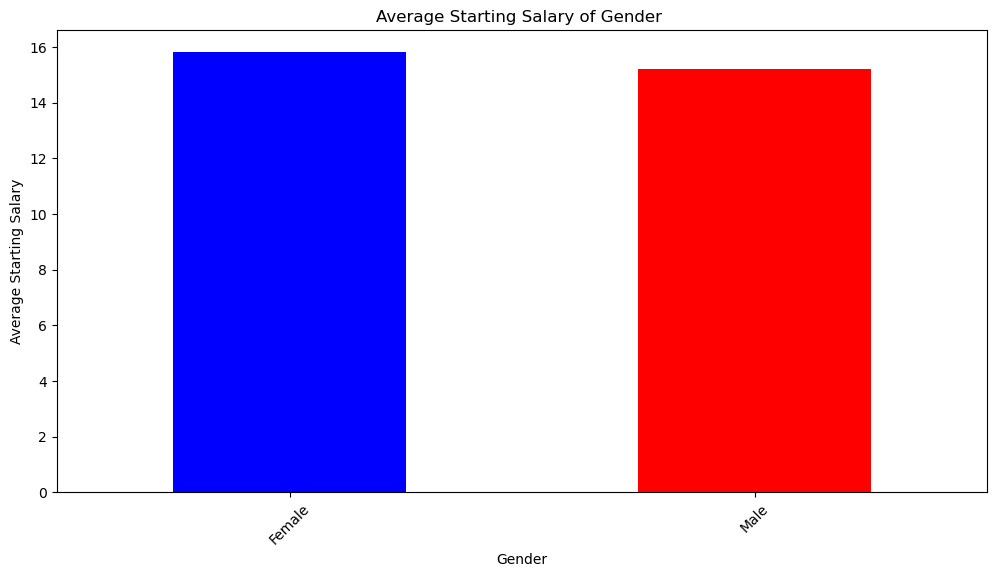

In [ ]:
# Draw independent variables chart
# Gender
gender = df.groupby('Gender')['Salary'].mean()
colors = ['blue', 'red']
gender.plot(kind='bar', figsize=(12, 6), title='Average Starting Salary of Gender ', color = colors)
plt.xlabel('Gender')
plt.ylabel('Average Starting Salary')
plt.xticks(rotation=45)
plt.show()

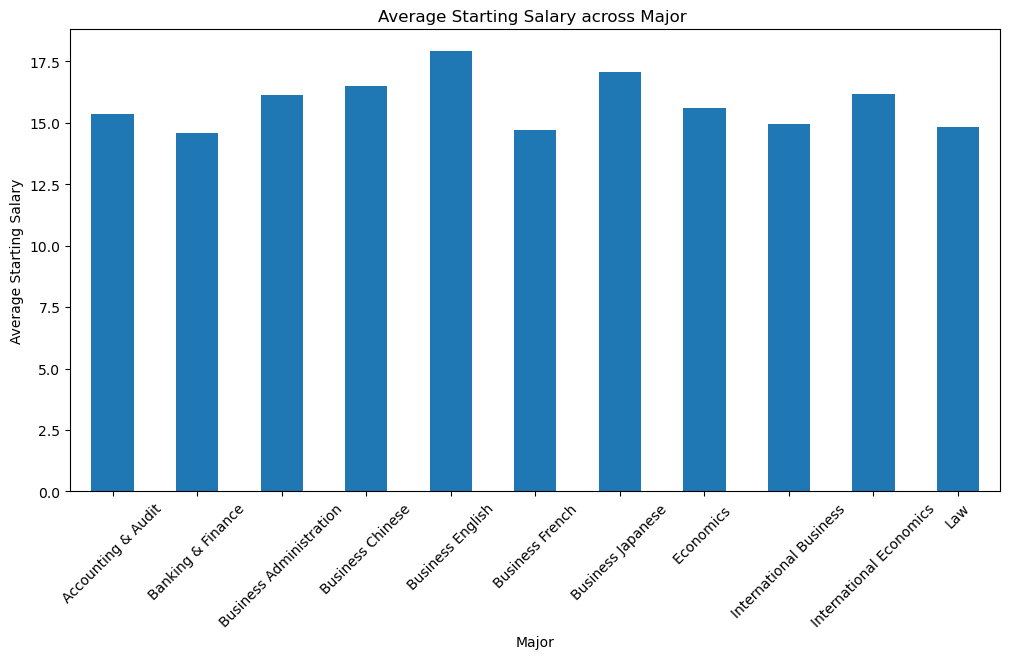

In [ ]:
# Major
major = df.groupby('Major')['Salary'].mean()
major.plot(kind='bar', figsize=(12, 6), title='Average Starting Salary across Major ')
plt.xlabel('Major')
plt.ylabel('Average Starting Salary')
plt.xticks(rotation=45)
plt.show()

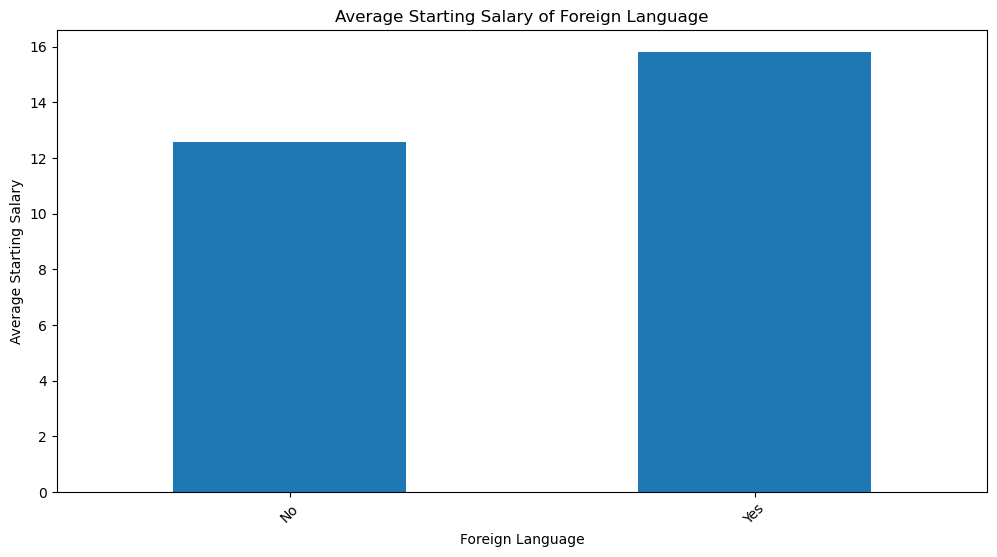

In [ ]:
# Foreign language proficiency
language = df.groupby('Language')['Salary'].mean()
language.plot(kind='bar', figsize=(12, 6), title='Average Starting Salary of Foreign Language')
plt.xlabel('Foreign Language')
plt.ylabel('Average Starting Salary')
plt.xticks(rotation=45)
plt.show()

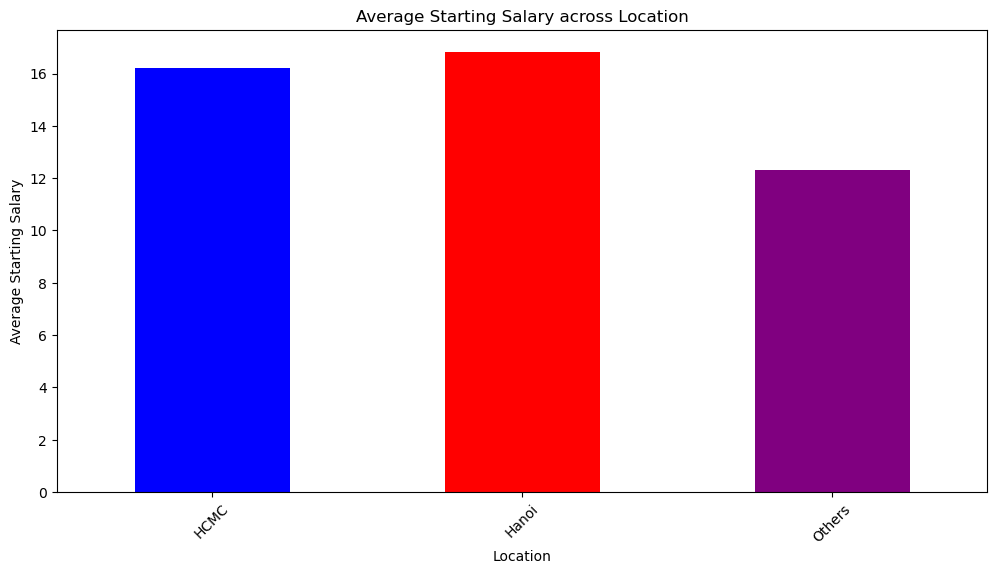

In [ ]:
# Location
location = df.groupby('Location')['Salary'].mean()
colors = ['blue', 'red', 'purple']
location.plot(kind='bar', figsize=(12, 6), title='Average Starting Salary across Location', color = colors)
plt.xlabel('Location')
plt.ylabel('Average Starting Salary')
plt.xticks(rotation=45)
plt.show()

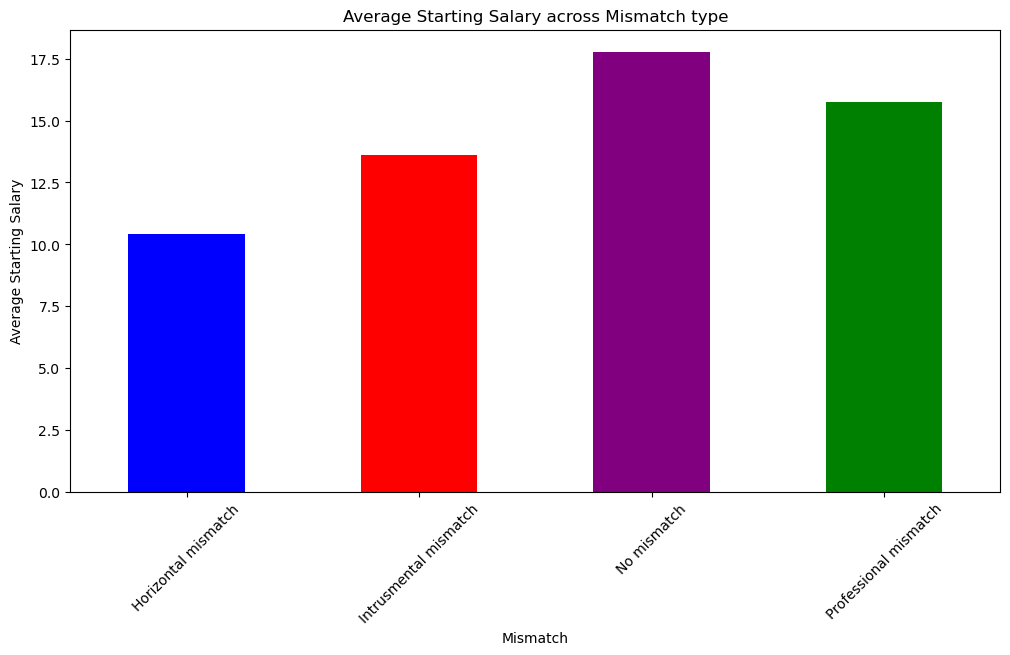

In [ ]:
# Mismatch type
mismatch = df.groupby('Mismatch')['Salary'].mean()
colors = ['blue', 'red', 'purple', 'green']
mismatch.plot(kind='bar', figsize=(12, 6), title='Average Starting Salary across Mismatch type', color = colors)
plt.xlabel('Mismatch')
plt.ylabel('Average Starting Salary')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define target variable and predictors
X = df.drop(columns="Salary")
y = df.Salary

In [ ]:
# Transform categorical variables
X = pd.get_dummies(X, drop_first = True)
X.head()

,Gender_Male,Major_Banking & Finance,Major_Business Administration,Major_Business Chinese,Major_Business English,Major_Business French,Major_Business Japanese,Major_Economics,Major_International Business,Major_International Economics,Major_Law,Language_Yes,Grade_Good,Grade_Pass,Grade_Very Good,Location_Hanoi,Location_Others,Mismatch_Intrusmental mismatch,Mismatch_No mismatch,Mismatch_Professional mismatch
0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0


In [ ]:
# Split training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
# Build Linear Regression Model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

# Evaluate the quality
reg.score(X_train,y_train), reg.score(X_test,y_test)

(0.6202637221073447, 0.5896789438201531)

In [ ]:
# MSE of testing set
from sklearn import metrics
y_pred = reg.predict(X_test)
metrics.mean_squared_error(y_test, y_pred)

9.758203001543631

In [ ]:
# MSE of training set
metrics.mean_squared_error(y_train, reg.predict(X_train))

9.18241757798734

In [ ]:
# Build Decision Tree Model
from sklearn import tree

treeLTV = tree.DecisionTreeRegressor(max_depth=3)
model = treeLTV.fit(X_train,y_train)

# Evaluate the quality
treeLTV.score(X_train, y_train), treeLTV.score(X_test, y_test)


(0.4232502787389941, 0.3973792966984977)

In [ ]:
# Calculate MSE of testing set
from sklearn import metrics
y_pred_LTV = treeLTV.predict(X_test)
metrics.mean_squared_error(y_test, y_pred_LTV)

14.331448672162674

In [ ]:
# Calculate MSE of training set
metrics.mean_squared_error(y_train, treeLTV.predict(X_train))

13.946407248726004

In [ ]:
# Improve Decision Tree by bagging
from sklearn.ensemble import BaggingRegressor
modelBag = BaggingRegressor(base_estimator=treeLTV, n_estimators=100, random_state=5)
modelBag.fit(X_train, y_train)
modelBag.score(X_train, y_train), modelBag.score(X_test, y_test)

(0.46501348284248956, 0.44166562463229064)

In [ ]:
# Shapley Additive Explanations
!pip install shap
import shap

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 456.1/456.1 kB 3.6 MB/s eta 0:00:00


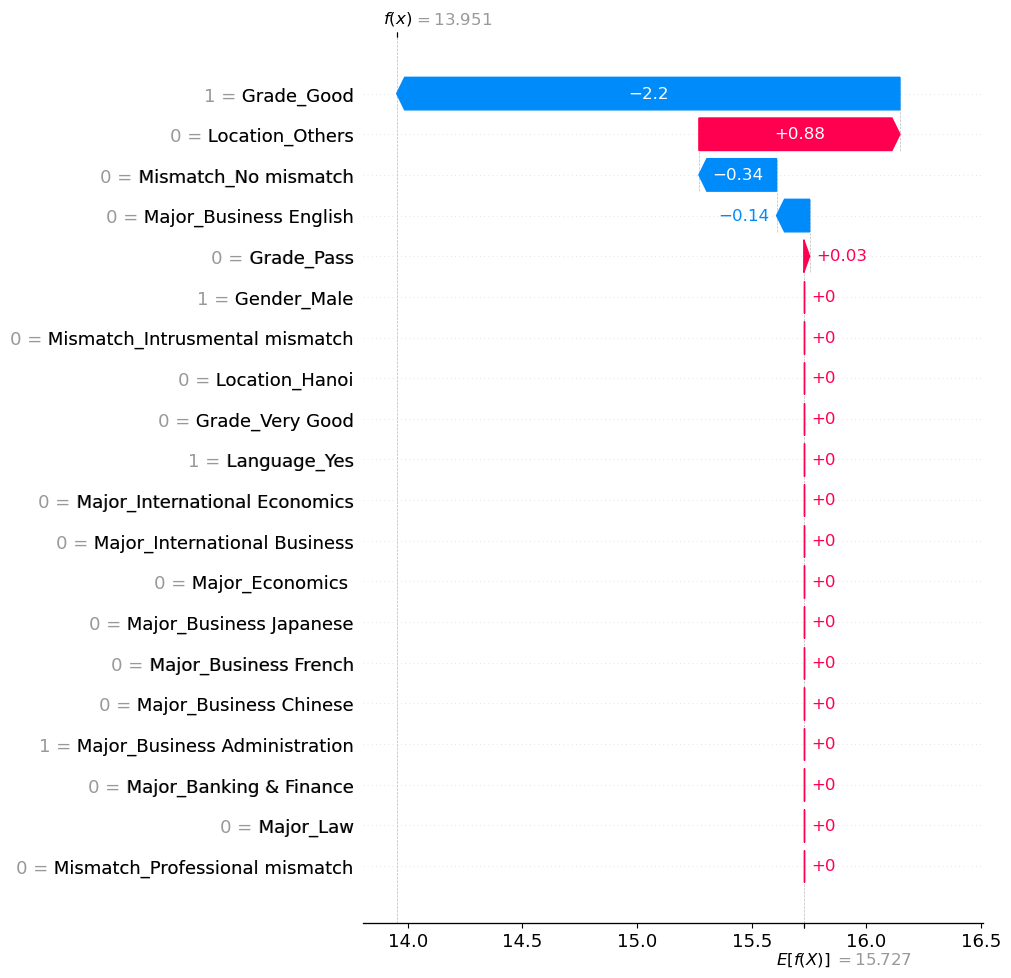

In [ ]:
# explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0],max_display=shap_values.shape[1])

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

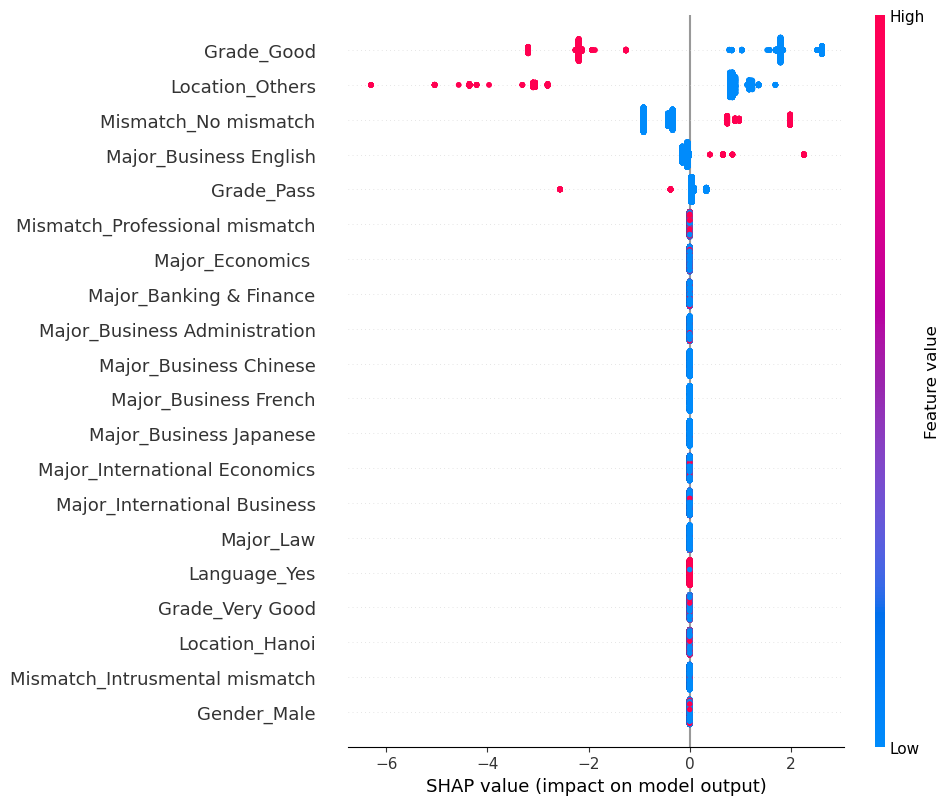

In [ ]:
shap.plots.beeswarm(shap_values, max_display=shap_values.shape[1])